Import the libraries I need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

plt.style.use('seaborn')
np.random.seed(seed = 1)


# Removing Outliers and Looking for Paterns

Load data

In [2]:
df = pd.read_csv('data_cleaned.csv', index_col=0)


I created a dataframe of features and one of targets

In [3]:
df_features = df[['age','position','Starts','Minutes','Goals','Assists','Penalty_Goals','Penalty_Attempts',
                  'Yellow_Cards','Red_Cards','Goals/90','Assists/90','Goals+Assists/90','Goals-PKs/90',
                  'Goals+Assists-PKs/90','xG','npxG','xA','xG/90','xA/90','xG+xA/90','npxG/90','npxG+xA/90',
                  'is_defence', 'is_midfield', 'is_attack']]
df_target = df.fee_cleaned

I created a dataframe of just my categorical data

In [4]:
df_categoricals = df_features[['position', 'is_defence', 'is_midfield', 'is_attack']]
df_features.columns

Index(['age', 'position', 'Starts', 'Minutes', 'Goals', 'Assists',
       'Penalty_Goals', 'Penalty_Attempts', 'Yellow_Cards', 'Red_Cards',
       'Goals/90', 'Assists/90', 'Goals+Assists/90', 'Goals-PKs/90',
       'Goals+Assists-PKs/90', 'xG', 'npxG', 'xA', 'xG/90', 'xA/90',
       'xG+xA/90', 'npxG/90', 'npxG+xA/90', 'is_defence', 'is_midfield',
       'is_attack'],
      dtype='object')

I used boxplots to look for outliers and than capped values that I felt were problematic

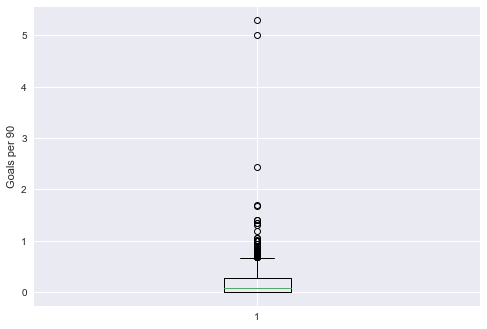

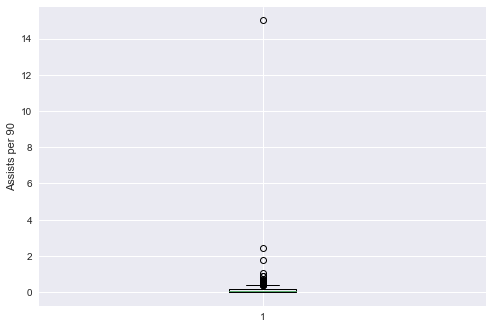

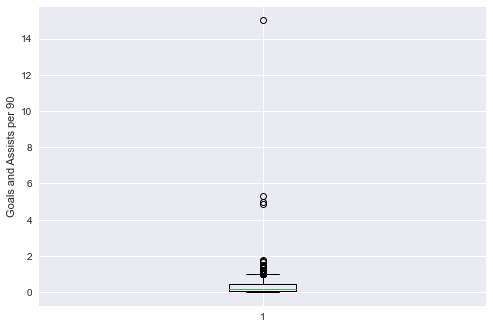

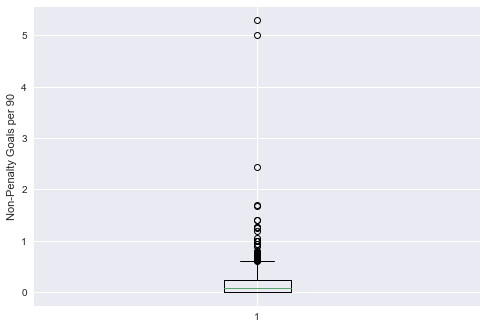

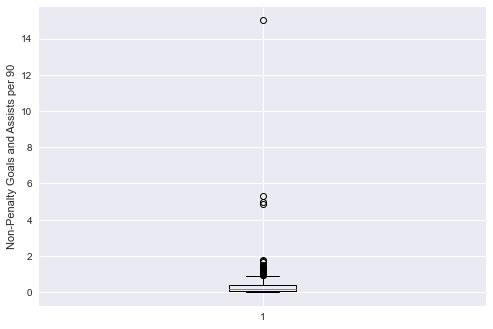

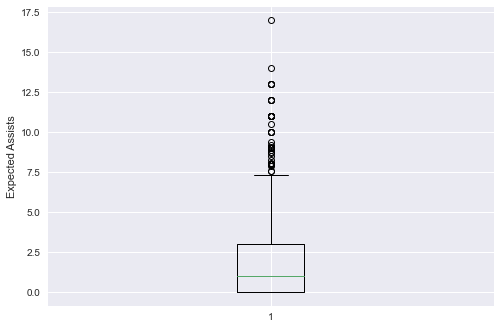

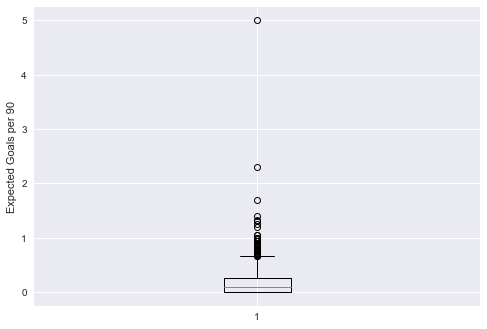

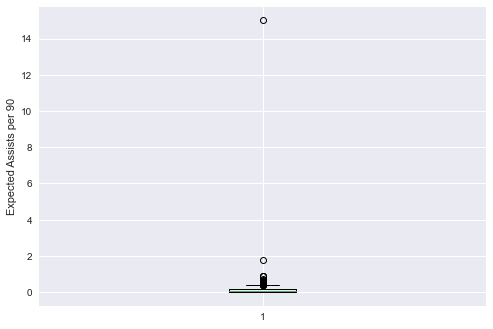

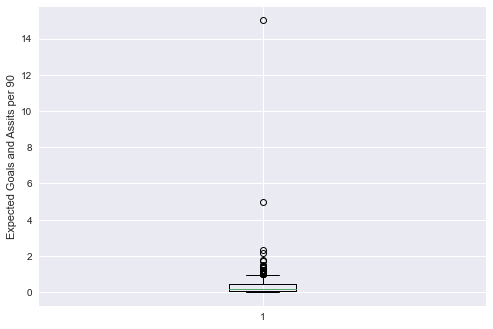

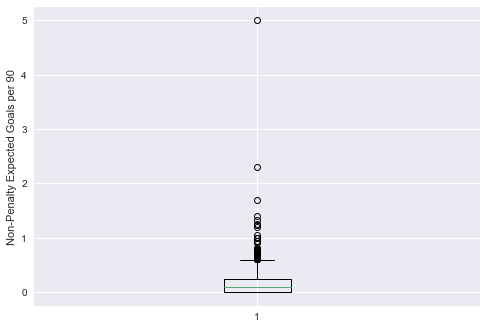

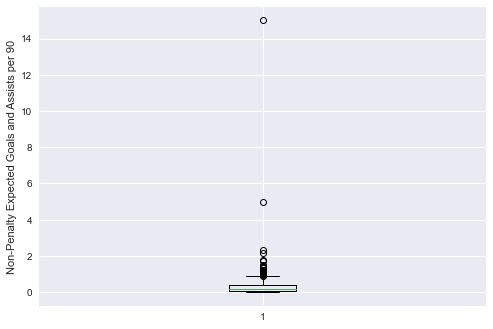

In [5]:
plt.boxplot(df_features['Goals/90'])
plt.ylabel('Goals per 90')
plt.show()
plt.boxplot(df_features['Assists/90'])
plt.ylabel('Assists per 90')
plt.show()
plt.boxplot(df_features['Goals+Assists/90'])
plt.ylabel('Goals and Assists per 90')
plt.show()
plt.boxplot(df_features['Goals-PKs/90'])
plt.ylabel('Non-Penalty Goals per 90')
plt.show()
plt.boxplot(df_features['Goals+Assists-PKs/90'])
plt.ylabel('Non-Penalty Goals and Assists per 90')
plt.show()
plt.boxplot(df_features['xA'])
plt.ylabel('Expected Assists')
plt.show()
plt.boxplot(df_features['xG/90'])
plt.ylabel('Expected Goals per 90')
plt.show()
plt.boxplot(df_features['xA/90'])
plt.ylabel('Expected Assists per 90')
plt.show()
plt.boxplot(df_features['xG+xA/90'])
plt.ylabel('Expected Goals and Assits per 90')
plt.show()
plt.boxplot(df_features['npxG/90'])
plt.ylabel('Non-Penalty Expected Goals per 90')
plt.show()
plt.boxplot(df_features['npxG+xA/90'])
plt.ylabel('Non-Penalty Expected Goals and Assists per 90')
plt.show()

In [6]:
df_features['Goals/90'] = df_features['Goals/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Assists/90'] = df_features['Assists/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Goals+Assists/90'] = df_features['Goals+Assists/90'].apply(lambda x: np.where(x > 3, 3, x))
df_features['Goals-PKs/90'] = df_features['Goals-PKs/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Goals+Assists-PKs/90'] = df_features['Goals+Assists-PKs/90'].apply(lambda x: np.where(x > 3, 3, x))
df_features['xA'] = df_features['xA'].apply(lambda x: np.where(x > 15, 15, x))
df_features['xG/90'] = df_features['xG/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['xA/90'] = df_features['xA/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['xG+xA/90'] = df_features['xG+xA/90'].apply(lambda x: np.where(x > 4, 4, x))
df_features['npxG/90'] = df_features['npxG/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['npxG+xA/90'] = df_features['npxG+xA/90'].apply(lambda x: np.where(x > 3, 3, x))

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

I look at the distributions of all my features

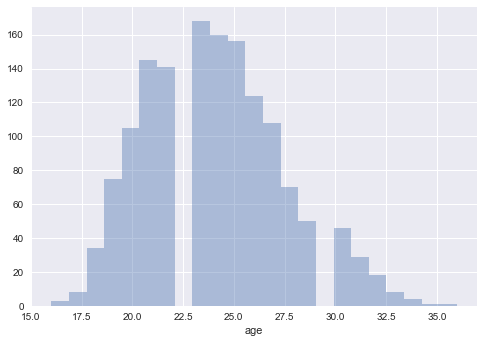

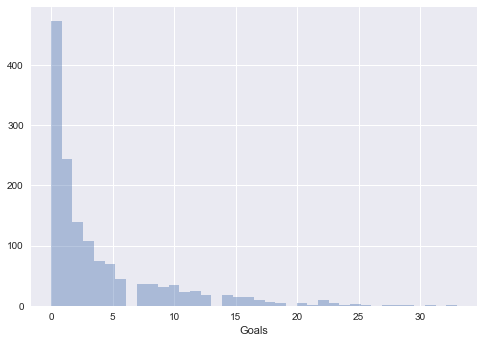

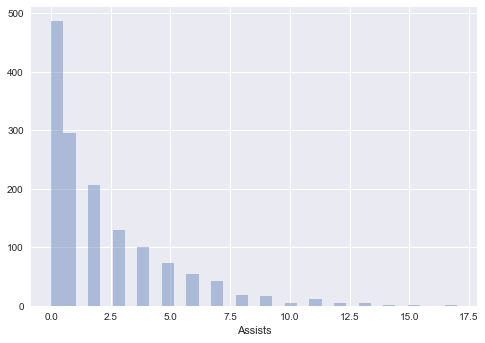

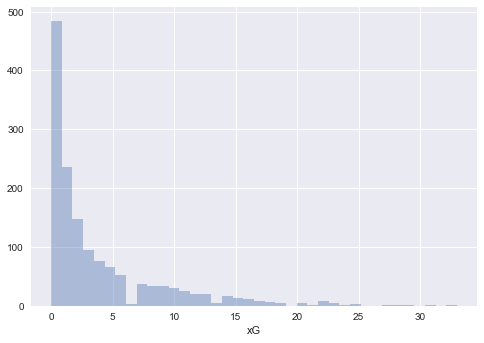

In [7]:
sns.distplot(df_features['age'], kde = False)
plt.show()
sns.distplot(df_features['Goals'], kde = False)
plt.show()
sns.distplot(df_features['Assists'], kde = False)
plt.show()
sns.distplot(df_features['xG'], kde = False)
plt.show()

I plot my features against my target to see if there is a clear pattern for any of them (There isn't)

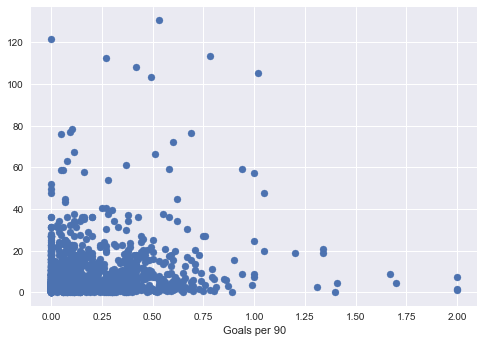

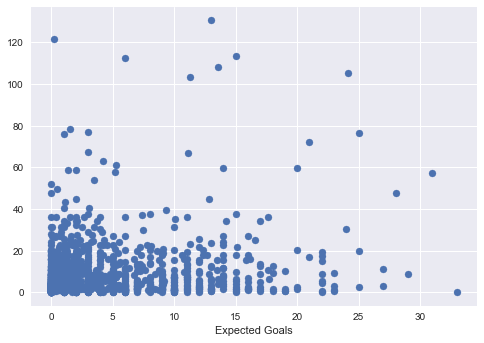

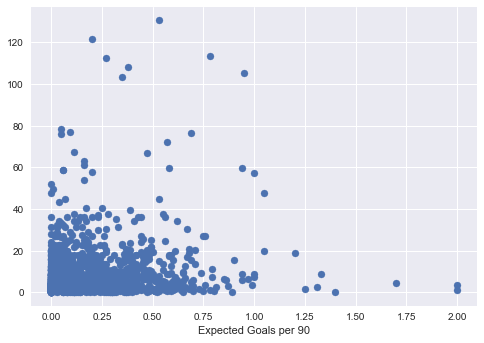

In [8]:
plt.scatter(df_features['Goals/90'], df_target)
plt.xlabel('Goals per 90')
plt.show()
plt.scatter(df_features['xG'], df_target)
plt.xlabel('Expected Goals')
plt.show()
plt.scatter(df_features['xG/90'], df_target)
plt.xlabel('Expected Goals per 90')
plt.show()

In [9]:
df_dummies = pd.get_dummies(df_features.position)
df_features = pd.concat([df_features, df_dummies], axis = 1)
df_features.drop(['position'], axis = 1, inplace = True)

# Modeling and Evaluation
Perform my train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state = 42)


Scaled my data

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Created a dummy regressor to compare my models against

In [12]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
y_train_preds = dummy.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


12.576039788991945

In [13]:
y_preds = dummy.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


12.24678321697676

Created a linear regression model

In [14]:
line = LinearRegression(n_jobs = -1)
line.fit(X_train, y_train)
y_train_preds = line.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


11.945055641107258

In [15]:
y_preds = line.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


11.456156486368753

Sorted features by coeffecients

In [16]:
sorted(list(zip(line.coef_, df_features.columns)))


[(-56.21940321634334, 'xG'),
 (-17.767702895212466, 'npxG/90'),
 (-17.54719936907125, 'Goals+Assists/90'),
 (-10.651957365421564, 'Goals/90'),
 (-4.9559338413847716, 'Starts'),
 (-4.477631139455966, 'xG+xA/90'),
 (-0.9737462780028965, 'Yellow_Cards'),
 (-0.7397352208819165, 'Left Midfield'),
 (-0.6268355983623553, 'age'),
 (-0.531922583738871, 'Centre-Forward'),
 (-0.39351312789187526, 'Right Midfield'),
 (-0.33580308247863044, 'Left-Back'),
 (-0.22061235957192574, 'Right-Back'),
 (-0.2014082309902449, 'Attacking Midfield'),
 (-0.18101153576599924, 'xA/90'),
 (-0.15897542245618887, 'Central Midfield'),
 (-0.14935718264873116, 'Right Winger'),
 (-0.1267943474773311, 'is_attack'),
 (-0.12484184220299442, 'is_midfield'),
 (-0.06958935242992506, 'Red_Cards'),
 (-0.05365478305564273, 'Penalty_Attempts'),
 (0.2456177996201387, 'is_defence'),
 (0.34373935917920145, 'Left Winger'),
 (0.4116549665592926, 'xA'),
 (0.597054183866855, 'Defensive Midfield'),
 (0.6519113974397006, 'Centre-Back'),
 (

Created a ridge model than used grid search to find optimal parameters

In [17]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_train_preds = ridge.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


11.979672491971026

In [18]:
y_preds = ridge.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


11.468996040943395

In [19]:
param_grid = {'alpha': [.01,.1,.5,1,5,10,15, 20, 25, 30, 100, 1000, 1500, 2500]}
ridge_CV = GridSearchCV(ridge, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
ridge_CV.fit(X_train, y_train)
print(ridge_CV.best_score_)
print(ridge_CV.best_params_)
y_preds = ridge_CV.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-12.14756156929301
{'alpha': 1000}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.3s finished


11.621335161467885

Plotted Coeffecients

In [20]:
sorted(list(zip(ridge.coef_, df_features.columns)))


[(-12.290572767573387, 'xG'),
 (-3.547472730272181, 'Starts'),
 (-2.5371851801728393, 'Goals+Assists/90'),
 (-2.3901523470822963, 'xG+xA/90'),
 (-1.1753439356440365, 'Penalty_Attempts'),
 (-0.9333628605569633, 'Yellow_Cards'),
 (-0.8020203027514491, 'Goals/90'),
 (-0.742306758867302, 'Left Midfield'),
 (-0.6432094674525344, 'age'),
 (-0.48186052447345706, 'Centre-Forward'),
 (-0.3943824762050621, 'Right Midfield'),
 (-0.33958101402236923, 'Left-Back'),
 (-0.2361140945299251, 'Attacking Midfield'),
 (-0.21252790803967164, 'Right-Back'),
 (-0.19069456025870604, 'Right Winger'),
 (-0.16888505106331664, 'xA'),
 (-0.16045005538051063, 'Central Midfield'),
 (-0.14625383766148187, 'is_midfield'),
 (-0.09944187953594681, 'is_attack'),
 (-0.06406091586540656, 'Red_Cards'),
 (0.23879121358907016, 'is_defence'),
 (0.34305985828229313, 'Left Winger'),
 (0.47226025730042637, 'npxG/90'),
 (0.5940487212510209, 'Defensive Midfield'),
 (0.6030785488911407, 'xA/90'),
 (0.640815168709834, 'Centre-Back'),

Created Lasso model than tuned hyper parameters with grid search than looked at coefficients

In [21]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_train_preds = lasso.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


12.28674293340579

In [22]:
y_preds = lasso.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


11.84499020908741

In [23]:
param_grid = {'alpha': [.01,.1,.5,1,5,10]}
lasso_CV = GridSearchCV(lasso, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
lasso_CV.fit(X_train, y_train)
print(lasso_CV.best_score_)
print(lasso_CV.best_params_)
y_preds = lasso_CV.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
-12.169630941838868
{'alpha': 0.5}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


11.681917944719398

In [24]:
sorted(list(zip(lasso.coef_, df_features.columns)))


[(0.0, 'Assists/90'),
 (-0.0, 'Attacking Midfield'),
 (-0.0, 'Central Midfield'),
 (0.0, 'Centre-Back'),
 (-0.0, 'Centre-Forward'),
 (0.0, 'Defensive Midfield'),
 (0.0, 'Goals+Assists-PKs/90'),
 (0.0, 'Goals+Assists/90'),
 (0.0, 'Goals-PKs/90'),
 (0.0, 'Goals/90'),
 (-0.0, 'Left Midfield'),
 (0.0, 'Left Winger'),
 (-0.0, 'Left-Back'),
 (0.0, 'Minutes'),
 (0.0, 'Penalty_Attempts'),
 (0.0, 'Penalty_Goals'),
 (-0.0, 'Red_Cards'),
 (-0.0, 'Right Midfield'),
 (0.0, 'Right Winger'),
 (-0.0, 'Right-Back'),
 (0.0, 'Second Striker'),
 (0.0, 'Starts'),
 (-0.0, 'Yellow_Cards'),
 (-0.0, 'age'),
 (0.0, 'is_attack'),
 (-0.0, 'is_defence'),
 (-0.0, 'is_midfield'),
 (0.0, 'npxG'),
 (0.0, 'npxG+xA/90'),
 (0.0, 'npxG/90'),
 (0.0, 'xA'),
 (0.0, 'xA/90'),
 (0.0, 'xG'),
 (0.0, 'xG+xA/90'),
 (0.0, 'xG/90'),
 (0.7400692678152119, 'Goals'),
 (1.2762662845964627, 'Assists')]

Did the same thing with support vector regressor

In [25]:
svr = SVR()
svr.fit(X_train, y_train)
y_train_preds = svr.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


12.843599764210266

In [26]:
y_preds = svr.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


12.580689969555532

In [27]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [.5,1,2,3], 'C': [1,5,10,25,50], 'epsilon': [.1, .5, 1, 5, 10]}
svr_CV = GridSearchCV(svr, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
svr_CV.fit(X_train, y_train)
print(svr_CV.best_score_)
print(svr_CV.best_params_)
y_preds = svr_CV.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1393 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   50.2s


-12.192840629208913
{'C': 10, 'degree': 0.5, 'epsilon': 5, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.2min finished


11.923272671343467

Created than tuned a decision tree regressor

In [28]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_train_preds = tree.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


0.5743571939468783

In [29]:
y_preds = tree.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


16.229114311334342

In [30]:
param_grid = {'max_depth': [None, 1, 2, 5, 10], 'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}
tree_CV = GridSearchCV(tree, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
tree_CV.fit(X_train, y_train)
print(tree_CV.best_score_)
print(tree_CV.best_params_)
y_preds = tree_CV.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s


-12.214885057595277
{'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 8}


[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    3.1s finished


12.384883932490657

Created and tuned a random forest model. This one performed best.

In [31]:
rf = RandomForestRegressor(n_jobs = -1, random_state = 1)
rf.fit(X_train, y_train)
y_train_preds = rf.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


4.853075179178826

In [32]:
y_preds = rf.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


11.746476773001746

In [33]:
param_grid = {'n_estimators': [5, 10, 25,50,100,500], 'max_depth': [None, 1, 2, 3, 4, 5, 10],
              'min_samples_split': [2,4,6,8,10,15,20]}
rf_CV = GridSearchCV(rf, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
rf_CV.fit(X_train, y_train)
print(rf_CV.best_score_)
print(rf_CV.best_params_)
y_preds = rf_CV.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:  3.1min finished


-12.128878617491724
{'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 5}


11.389972919024368

In [40]:
y_preds = rf_CV.predict(X_test)

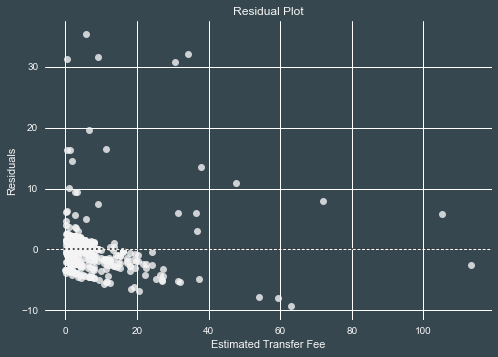

In [43]:
fig = plt.figure(facecolor = '#37474f')
ax = sns.residplot(y_test, y_preds, color = '#f5f5f5')
plt.title('Residual Plot', color = '#f5f5f5')
plt.xlabel('Estimated Transfer Fee', color = '#f5f5f5')
plt.ylabel('Residuals', color = '#f5f5f5')
plt.xticks(color = '#f5f5f5')
plt.yticks(color = '#f5f5f5')
ax.set_facecolor('#37474f')

Examine feature importances

In [35]:
sorted(zip(rf_CV.best_estimator_.feature_importances_, df_features.columns))

[(0.0, 'Attacking Midfield'),
 (0.0, 'Central Midfield'),
 (0.0, 'Centre-Forward'),
 (0.0, 'Defensive Midfield'),
 (0.0, 'Goals-PKs/90'),
 (0.0, 'Left Midfield'),
 (0.0, 'Left-Back'),
 (0.0, 'Penalty_Attempts'),
 (0.0, 'Right Midfield'),
 (0.0, 'Right Winger'),
 (0.0, 'Right-Back'),
 (0.0, 'Yellow_Cards'),
 (0.0, 'is_attack'),
 (0.0, 'is_defence'),
 (0.0, 'is_midfield'),
 (0.0, 'xG/90'),
 (0.003733914343934889, 'xA/90'),
 (0.006979416755910292, 'age'),
 (0.008556582441200817, 'Starts'),
 (0.008947487080235433, 'Red_Cards'),
 (0.00912725828718661, 'Centre-Back'),
 (0.01172734995917369, 'xA'),
 (0.017340129818285827, 'npxG+xA/90'),
 (0.020259844835415947, 'Penalty_Goals'),
 (0.02187215702967813, 'Assists/90'),
 (0.024293413097629307, 'xG+xA/90'),
 (0.04539346610729945, 'npxG'),
 (0.047142717885454516, 'Goals/90'),
 (0.05531584650474917, 'xG'),
 (0.06384548376369412, 'Goals'),
 (0.07527608264895158, 'npxG/90'),
 (0.07644187089538136, 'Goals+Assists/90'),
 (0.07692592276425354, 'Second Str

Lastly I used an xgboost model and tuned hyperparametes.

In [36]:
xg = xgb.XGBRegressor(n_jobs = -1, objective = 'reg:squarederror', eval_metric = 'rmse')
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
mean_squared_error(y_train, y_train_preds)**(1/2)


1.215030046999397

In [37]:
y_preds = xg.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)


12.729188827496957

In [38]:
sorted(zip(xg.feature_importances_, df_features.columns))


[(0.0044081816, 'Left-Back'),
 (0.004467047, 'Penalty_Attempts'),
 (0.0047162347, 'Central Midfield'),
 (0.0072989124, 'Defensive Midfield'),
 (0.00811699, 'Right Winger'),
 (0.00859931, 'Assists/90'),
 (0.009251139, 'Centre-Back'),
 (0.009873895, 'Right-Back'),
 (0.01032367, 'is_defence'),
 (0.010406257, 'xA/90'),
 (0.010441739, 'Red_Cards'),
 (0.012015592, 'Right Midfield'),
 (0.012033916, 'Left Midfield'),
 (0.012538184, 'Starts'),
 (0.012557619, 'age'),
 (0.013130587, 'Centre-Forward'),
 (0.014046554, 'is_midfield'),
 (0.015302745, 'Minutes'),
 (0.015870897, 'Goals-PKs/90'),
 (0.016197294, 'Attacking Midfield'),
 (0.018368926, 'Yellow_Cards'),
 (0.019278776, 'Goals/90'),
 (0.020559067, 'xG/90'),
 (0.021760605, 'npxG'),
 (0.025872208, 'Goals+Assists-PKs/90'),
 (0.026402956, 'npxG+xA/90'),
 (0.033240046, 'Goals'),
 (0.033254035, 'xA'),
 (0.03825296, 'xG+xA/90'),
 (0.039958697, 'xG'),
 (0.044858325, 'Goals+Assists/90'),
 (0.055941634, 'npxG/90'),
 (0.058066867, 'Penalty_Goals'),
 (0.0

In [39]:
param_grid = {'eta': [1e-100, 1e-50, 1e-20, 1e-10,.000000001, .00000001],
              'max_depth': [1,2,3],
              'min_child_weight': [15,20, 25, 30, 50, 75,  100]}
xg_CV = GridSearchCV(xg, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
xg_CV.fit(X_train, y_train)
print(xg_CV.best_score_)
print(xg_CV.best_params_)
y_preds = xg_CV.predict(X_test)
mean_squared_error(y_test, y_preds)**(1/2)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s


-12.041900684138943
{'eta': 1e-20, 'max_depth': 1, 'min_child_weight': 50}


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:   11.6s finished


11.42050275721072